In [1]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

%matplotlib inline

### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt-get update
!apt install ghostscript python3-tk
!pip install svgling
#from ctypes.util import find_library
#find_library("gs")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 780 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 xvfb amd64 2:1.20.13-1ubuntu1~20.04.5 [780 kB]
Fetched 780 kB in 0s (2,858 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 129506 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.20.13-1ubuntu1~20.04.5_amd64.deb ...
Unpacking xvfb (2:1.20.13-1ubuntu1~20.04.5) ...
Setting up xvfb (2:1.20.13-1ubuntu1~20.04.5) ...
Processing triggers for man-db (2.9.1-1) ...
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [

#Transitivity.
1.In a context-free grammar, transitive verbs are typically represented by a non-terminal symbol, which is then expanded into a production rule that defines the structures for the verb phrase. For example, a transitive verb such as "saw" in the sentence "He saw him" is  represented by the non-terminal symbol "V", and the production rule for "V" includes the structure "V NP" (verb + noun phrase), this indicates that a transitive verb is always followed by a noun phrase.


2.In a context-free grammar (CFG), ditransitive verbs are represented by a non-terminal symbol, which is then expanded into a production rule that defines the structure for the verb phrase. Ditransitive verbs are verbs that take two direct objects. 

For example, a ditransitive verb such as "teach" can be represented by the non-terminal symbol "V", and the production rule for "V"  includes the structure "V NP NP" (verb + noun phrase + noun phrase), indicating that a ditransitive verb is always followed by two noun phrases, one representing the recipient of the action and the other representing the object that is being given. 

3.In a context-free grammar (CFG), intransitive verbs are typically represented by a non-terminal symbol, which is then expanded into a production rule that defines the structures for the verb phrase. Intransitive verbs are verbs that do not take any direct objects.

For example, an intransitive verb such as "sleep" might be represented by the non-terminal symbol "V", and the production rule for "V" might include the structure "V" (verb), indicating that an intransitive verb does not take an object.

We can see from the rules that, CFG treats intransitive verbs differently from transitive or ditransitive verbs, by associating them with non-terminal symbols and production rules that do not specify any direct object.

#Cases.
In English, nouns have different forms depending on whether they are the subject or the object of a sentence. A CFG for English language represents the subject and object cases of nouns by using different non-terminal symbols for each case. The grammar can be contain specific rules for how these different forms of nouns can be used in different parts of the sentence.

Overall, CFG can be used to model different cases in languages by using different non-terminal symbols to represent each case and specifying the grammar rules that govern how these different forms of words can be used in a sentence.

#Types of sentences.
1. I slept. (Intransitive sentence)
2. He saw him. (Transitive sentence)
3. She teaches  English to him. (Ditransitive sentence)
4. I ate apple and oranges. (Conjunction)
5. I know that he is here. (Complex sentence)
6. The boy who is from India.( Relative Clause)
7. I saw the man with the Telescope. (Ambiguity)

#Explanation of the CFG Rules.
1. The starting symbol is "S", which represents a sentence.
The rule "S -> NP VP | Det NP Rel".
means that a sentence (S) can be generated by either a noun phrase (NP) followed by a verb phrase (VP) or a determiner (Det) followed by a noun phrase (NP) and a relative clause (Rel).

2. The rule "Rel -> "who" VP".
means that a relative clause (Rel) can be generated by the relative pronoun "who" followed by a verb phrase (VP).

3. The rule "VP -> V | V NP | V NP PP | V Compp | V Advp | V PP" 
means that a verb phrase (VP) can be generated by a verb (V) or a verb (V) followed by a noun phrase (NP) or a verb (V) followed by a noun phrase (NP) and a prepositional phrase (PP) or a verb (V) followed by a complementizer phrase (Compp) or a verb (V) followed by an adverb phrase (Advp) or a verb (V) followed by a prepositional phrase (PP)

4. The rule "NP -> N | N P N | Det N | N N Conj Det N" 
means that a noun phrase (NP) can be generated by one or more of the following:
A single noun (N)
A noun (N) followed by a preposition (P) and another noun (N)
A determiner (Det) followed by a noun (N)
A noun (N) followed by another noun (N) and a conjunction (Conj) and a determiner (Det) and a noun (N)

5. The rule "PP -> P | P NP"
 means that a prepositional phrase (PP) can be generated by a preposition (P) or a preposition (P) followed by a noun phrase (NP).

6. The rule "compp -> comp S" means that a complementizer phrase (compp) can be generated by a complementizer (comp) followed by a sentence (S).

7. The rule "Advp -> Adv" means that a adverb phrase (Advp) can be generated by an adverb (Adv).


#Ambiguious Sentence.
CFG (Context-Free Grammar) treats ambiguious sentences by allowing multiple parse trees to be generated for different readings of a single sentence. Each parse tree represents a different syntactic structure or meaning for the sentence, indicating that the sentence has multiple readings.

For example, If we see the sentence "I saw the man with the telescope." Using a CFG, multiple parse trees can be generated for this sentence, each one representing a specific reading:

One parse tree gives a reading as, "I observed a man using a telescope."

Another parse tree gives a reading as "I observed a man who was holding a telescope."

These different parse trees are generated based on the different structures that has different readings of the sentence that the CFG can recognize.



In [4]:
import nltk
from nltk import CFG

grammar = CFG.fromstring("""

S -> NP VP | Det NP Rel 
Rel -> "who" VP
VP -> V | V NP | V NP PP | V Compp | V Advp | V PP
NP -> N | N P N | Det N | N N Conj Det N | N PP | NP PP
PP -> P | P NP
compp -> comp S
Advp -> Adv
N -> "I" | "He" | "him" | "English" | "she" |" apple"|"orange"|"boy" | "India" |"man" | "telescope"
V -> "slept" | "saw" | "teaches" | "ate" | "know" | "is" 
P -> "to" | "from" | "with"
Det -> "a" | "an" | "the"
Conj -> "and"
Comp -> "that"
Adv -> "here"
 """)

(S
  (NP (N I))
  (VP
    (V saw)
    (NP (Det the) (N man))
    (PP (P with) (NP (Det the) (N telescope)))))


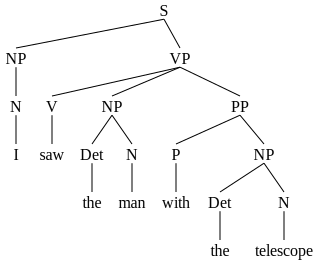

(S
  (NP (N I))
  (VP
    (V saw)
    (NP
      (NP (Det the) (N man))
      (PP (P with) (NP (Det the) (N telescope))))))


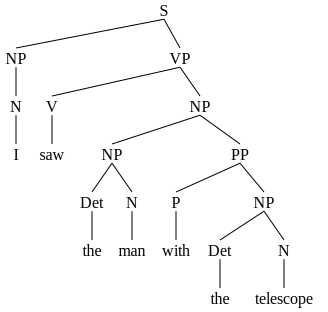

In [5]:
sentence = "I saw the man with the telescope".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sentence): 
  print(p)
  display(p)

In [15]:
#In transitive sentence.
sent1 = "He slept".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sent1): print(p)

(S (NP (N He)) (VP (V slept)))


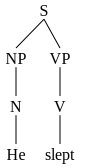

In [16]:
display(p)

In [11]:
#Transitive sentence.
sent2 = "He saw him".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sent2): print(p)

(S (NP (N He)) (VP (V saw) (NP (N him))))


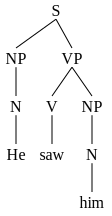

In [12]:
display(p)

In [13]:
import nltk

from nltk import CFG
from IPython.display import display

grammar_3= CFG.fromstring("""
   S -> NP VP
   PP -> P NP
   NP -> N | NP PP
   VP -> V NP | VP PP
   N -> 'She' | 'English'|'him'
   V -> 'teaches'
   P -> 'to' 
 """)

In [18]:
#Di transitive 
sent3 = "she teaches English to him ".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sent3): print(p)

(S (NP (N she)) (VP (V teaches) (NP (N English) (P to) (N him))))
(S
  (NP (N she))
  (VP (V teaches) (NP (NP (N English)) (PP (P to) (NP (N him))))))
(S
  (NP (N she))
  (VP (V teaches) (NP (N English) (PP (P to) (NP (N him))))))
(S
  (NP (N she))
  (VP (V teaches) (NP (N English)) (PP (P to) (NP (N him)))))


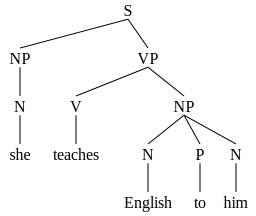

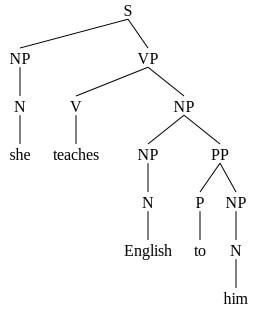

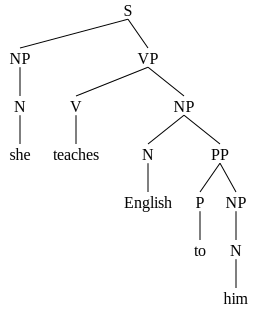

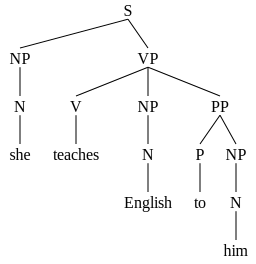

In [19]:
for p in chart_parser.parse(sent3): display(p)